This is my first time trying to understand neural networks. I try to start with as simple as possible network. To really gain understanding what happens within algorithm I try to code neural network from scratch using so few libraries as possible. Following libraries are imported to make plotting and matrix operations slightly easier.

In [170]:
import numpy as np
import matplotlib.pyplot as plt

We need some data to train our model. We could find some real data set and have possibly more interesting results. Nevertheless, since this is only the first neural network, I decided to create data my self. Data is follows sin curve with slight randomness added to it. When we have clear pattern in the data it's easier to see whether our code converges to reasonable solution.

In [171]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

hours = np.reshape(hours, (len(hours), 1))
passed = np.reshape(passed, (len(passed), 1))

test_y = []
test_x = []

for i in range(200):
    test_y.append(np.sin(i/20) + np.random.normal()/10)
    test_x.append(i/20)

test_y = np.reshape(test_y, (len(test_y), 1))
test_x = np.reshape(test_x, (len(test_x), 1))

Now that we have data and all the libraries we need, we can start working on our algorithm. Neural network consits of multiple nodes and possible multiple layers. Since I want to keep my neural network as simple as possible at the beginning my network contains only one layer. This layer consists of ten nodes.

![alt text](content/nnw.png "Neural network")

In [172]:
def forward(w1, x, b1):
    return np.dot(x, w1) + b1

In [173]:
def activation_function(Z):
    return np.log(1 + np.exp(Z))

In [174]:
def forward_propagation(w2, X2, b3):
    return np.dot(X2, w2.T) + b3

In [175]:
def loss_function(y, y_pred):
    return np.sum((y - y_pred) ** 2)

In [176]:
def backward_propagation(y, y_pred, X, w1, w2, b, b3, learning_rate):
    y_pred = np.reshape(y_pred, (len(y_pred), 1))

    dw1 = sum(-2 * (y - y_pred) * w2 * np.exp(forward(w1, X, b)) / (1 + np.exp(forward(w1, X, b))) * X)

    db = sum(-2 * (y - y_pred) * w2 * np.exp(forward(w1, X, b)) / (1 + np.exp(forward(w1, X, b))) * 1)

    dw2 = sum(-2 * (y - y_pred) * activation_function(forward(w1, X, b)))

    db3 =  sum(-2 * (y - y_pred))

    w1 = w1 - dw1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b = b - db * learning_rate
    b3 = b3 - db3 * learning_rate
    return w1, w2, b, b3

In [177]:
def train(y, x, w1, w2, b, b3, iter, learning_rate):
    losses = []
    y_pred = []
    for i in range(iter):
        first = forward(w1, x, b)
        Z = activation_function(first)
        y_pred = forward_propagation(w2, Z, b3)
        losses.append(loss_function(x, y_pred))
        w1, w2, b, b3 = backward_propagation(y, y_pred, x, w1, w2, b, b3, learning_rate)
    return losses, y_pred

number_of_nodes = 20

iterations = 100000
learning_rate = 0.0001
weight_1 = np.random.normal(size=number_of_nodes)
weight_1 = np.reshape(weight_1, (1, len(weight_1)))
weight_2 = np.random.normal(size=number_of_nodes)
weight_2 = np.reshape(weight_2, (1, len(weight_2)))
bias, bias_3 = [0] * len(weight_1), 0

sp, y_pred = train(test_y, test_x, weight_1, weight_2, bias, bias_3, iterations, learning_rate)

In [178]:
#_pred

In [179]:
#sp

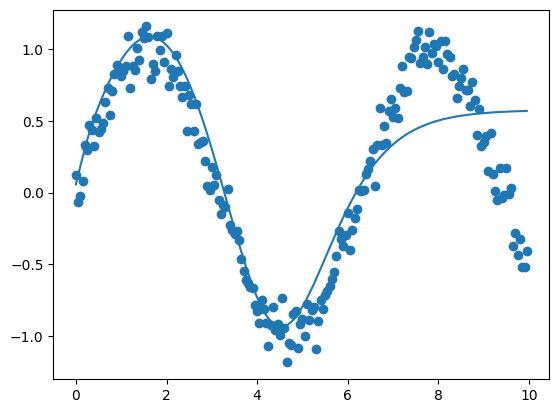

In [181]:
plt.plot(test_x, y_pred)
plt.scatter(test_x, test_y)